In [23]:
import pandas as pd
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('facebook.txt', header = None,delimiter=' ')
E = data.values
V = np.unique(E)

# function for calculating influence
def I(E,S):
    N_S = S
    for s in S:
        N_S=np.append(N_S,E[E[:,0]==s,1])
    I_S = len(np.unique(N_S))
    return I_S

# greed algorithm, we added S as an input so we don't repeat caculations below
def greedy(E,V,K,S):
    k = len(S)
    while k < K and I(E,S)<len(V):
        I_S_a_opt = 0
        a_opt = []
        for a in np.setdiff1d(V,S):
            I_S_a = I(E,np.append(S,a))-I(E,S)
            if I_S_a > I_S_a_opt:
                a_opt = a
                I_S_a_opt = I_S_a
        S = np.append(S,a_opt)
        k+=1
    return S, I(E,S)

# an example of users to seed and total influence for a budge of k=2
greedy(E,V,2,np.asarray([]))

(array([ 107., 1684.]), 1820)

In [28]:
k_max = 15
S = np.asarray([])
I_k = np.zeros(k_max)
for i in trange(k_max):
    S,I_k[i] = greedy(E,V,i,S)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:40<00:00,  6.71s/it]


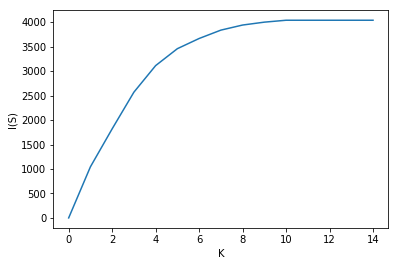

In [31]:
# plot the influence as a function of K
plt.plot(np.arange(0,k_max),I_k)
plt.ylabel('I(S)')
plt.xlabel('K')
plt.show()